# Extracting Dataset using Kaggle API

In [ ]:
# installing the Kaggle library
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
# Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 801M/812M [00:07<00:00, 76.5MB/s]
100% 812M/812M [00:07<00:00, 113MB/s] 


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


# Printing the name of images

In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.9537.jpg', 'cat.6804.jpg', 'cat.7168.jpg', 'cat.1741.jpg', 'dog.6143.jpg', 'cat.8645.jpg', 'dog.4635.jpg', 'dog.10496.jpg', 'dog.6393.jpg', 'dog.11831.jpg', 'dog.1629.jpg', 'dog.3609.jpg', 'cat.8253.jpg', 'cat.3673.jpg', 'dog.7192.jpg', 'cat.5966.jpg', 'cat.6497.jpg', 'dog.4169.jpg', 'dog.9389.jpg', 'cat.11248.jpg', 'cat.3127.jpg', 'dog.10847.jpg', 'cat.9414.jpg', 'dog.7625.jpg', 'dog.6729.jpg', 'dog.7151.jpg', 'dog.3516.jpg', 'cat.8557.jpg', 'dog.488.jpg', 'dog.2225.jpg', 'cat.7281.jpg', 'dog.6004.jpg', 'cat.3799.jpg', 'cat.11325.jpg', 'dog.11069.jpg', 'cat.722.jpg', 'cat.1861.jpg', 'cat.6838.jpg', 'dog.10146.jpg', 'dog.2993.jpg', 'dog.2286.jpg', 'cat.6839.jpg', 'cat.1928.jpg', 'dog.6218.jpg', 'cat.1987.jpg', 'cat.4477.jpg', 'dog.3038.jpg', 'cat.7832.jpg', 'dog.9775.jpg', 'cat.4278.jpg', 'cat.4692.jpg', 'cat.4493.jpg', 'cat.9806.jpg', 'cat.11945.jpg', 'dog.7813.jpg', 'cat.8208.jpg', 'cat.11012.jpg', 'cat.5020.jpg', 'cat.8222.jpg', 'cat.10768.jpg', 'cat.9864.jpg', 'cat.11415.jpg'

# Importing the Dependencies

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

# Displaying the images of dogs and cats

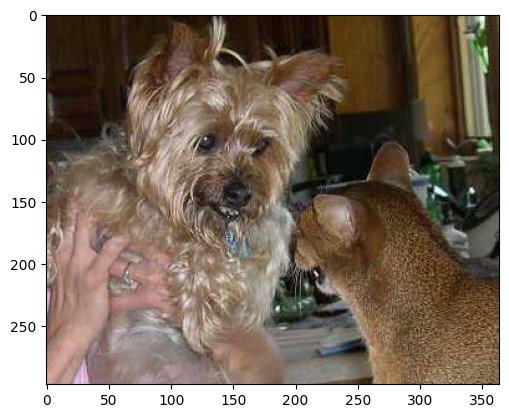

In [ ]:
# display dog image
img = mpimg.imread('/content/train/dog.6143.jpg')
imgplt = plt.imshow(img)
plt.show()

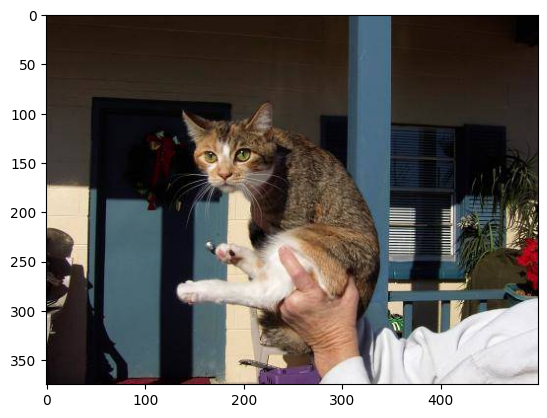

In [ ]:
# display cat image
img = mpimg.imread('/content/train/cat.9537.jpg')
imgplt = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
cat
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


# Resizing all the images

In [ ]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

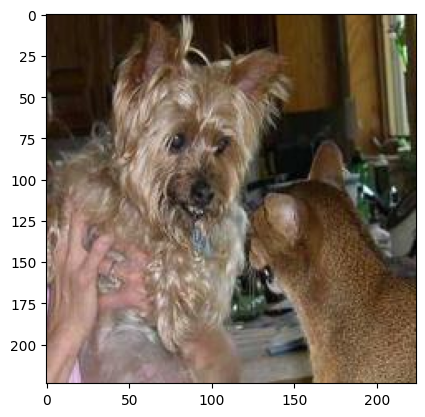

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.6143.jpg')
imgplt = plt.imshow(img)
plt.show()

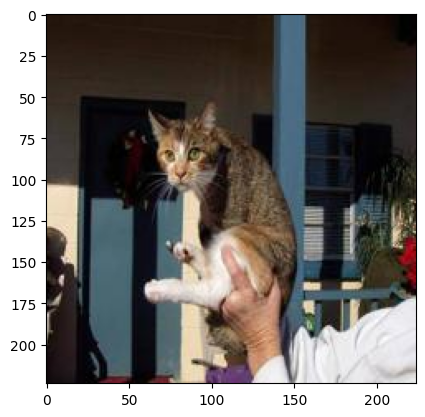

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.9537.jpg')
imgplt = plt.imshow(img)
plt.show()

# **Creating labels for resized images of dogs and cats**

Cat --> 0

Dog --> 1

In [ ]:
# creating a for loop to assign labels
filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.9537.jpg', 'cat.6804.jpg', 'cat.7168.jpg', 'cat.1741.jpg', 'dog.6143.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1005  995]


# Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob

In [ ]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 14  23  37]
   [ 13  22  36]
   [ 12  21  35]
   ...
   [  2   1   3]
   [  2   1   5]
   [  2   1   5]]

  [[ 14  23  37]
   [ 14  23  37]
   [ 13  22  36]
   ...
   [  2   1   3]
   [  2   1   5]
   [  2   1   5]]

  [[ 15  24  38]
   [ 15  24  38]
   [ 14  23  37]
   ...
   [  2   1   3]
   [  2   1   5]
   [  2   1   5]]

  ...

  [[ 10   8  14]
   [ 11   9  15]
   [ 12  10  16]
   ...
   [231 231 231]
   [232 232 232]
   [232 232 232]]

  [[  9   7  13]
   [ 10   8  14]
   [ 12  10  16]
   ...
   [235 236 234]
   [237 238 236]
   [239 240 238]]

  [[  9   7  13]
   [ 10   8  14]
   [ 12  10  16]
   ...
   [228 229 227]
   [230 231 229]
   [234 235 233]]]


 [[[188 190 200]
   [186 188 198]
   [182 188 195]
   ...
   [138 128 128]
   [189 177 175]
   [173 161 159]]

  [[187 189 199]
   [185 187 197]
   [181 187 194]
   ...
   [139 129 129]
   [185 173 171]
   [165 153 151]]

  [[186 188 198]
   [184 186 196]
   [180 186 193]
   ...
   [140 128 128]
   [179 166 164]
   [155 142

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

# **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.81960784 0.7254902  0.65490196]
   [0.81568627 0.72156863 0.65098039]
   [0.81176471 0.70980392 0.64313725]
   ...
   [0.22352941 0.41176471 0.29803922]
   [0.21176471 0.4        0.28627451]
   [0.19215686 0.38039216 0.26666667]]

  [[0.81568627 0.71372549 0.64705882]
   [0.81568627 0.71372549 0.64705882]
   [0.81960784 0.71764706 0.65098039]
   ...
   [0.25098039 0.44705882 0.32941176]
   [0.22352941 0.41960784 0.30196078]
   [0.20392157 0.4        0.28235294]]

  [[0.81960784 0.70980392 0.64313725]
   [0.81960784 0.70980392 0.64313725]
   [0.82352941 0.71372549 0.64705882]
   ...
   [0.23529412 0.43921569 0.32156863]
   [0.21960784 0.42352941 0.30588235]
   [0.21176471 0.41568627 0.29803922]]

  ...

  [[0.18823529 0.36862745 0.22745098]
   [0.19215686 0.37254902 0.23137255]
   [0.22352941 0.38431373 0.25882353]
   ...
   [0.12941176 0.25490196 0.16078431]
   [0.14509804 0.25882353 0.16862745]
   [0.17254902 0.28627451 0.19607843]]

  [[0.19215686 0.37647059 0.22745098]
   [0.1

# **Building the Neural Network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 72s 1s/step - loss: 0.2521 - acc: 0.8931
Epoch 2/5
50/50 [==============================] - 61s 1s/step - loss: 0.0742 - acc: 0.9731
Epoch 3/5
50/50 [==============================] - 60s 1s/step - loss: 0.0570 - acc: 0.9825
Epoch 4/5
50/50 [==============================] - 59s 1s/step - loss: 0.0429 - acc: 0.9887
Epoch 5/5
50/50 [==============================] - 59s 1s/step - loss: 0.0364 - acc: 0.9894


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0347 - acc: 0.9925
Test Loss = 0.03471151739358902
Test Accuracy = 0.9925000071525574


# **Predictive System**

Path of the image to be predicted: /content/dog.png


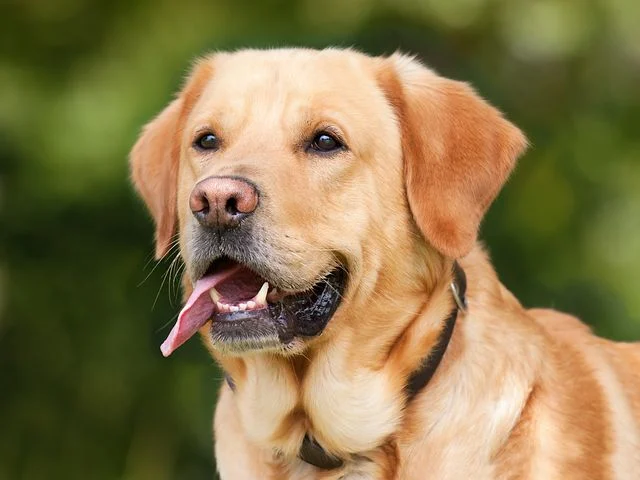

1/1 [==============================] - 0s 71ms/step
[[-6.3901496  3.3937602]]
1
The image represents a Dog


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.png


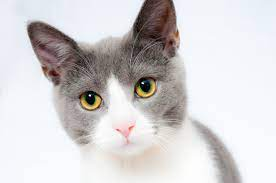

1/1 [==============================] - 0s 46ms/step
[[ 4.5036683 -4.4922423]]
0
The image represents a Cat


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')